In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, SimpleRNN
from keras.optimizers import Adam
from keras.models import Model

In [2]:
plt.rcParams['figure.figsize'] = [6, 3]

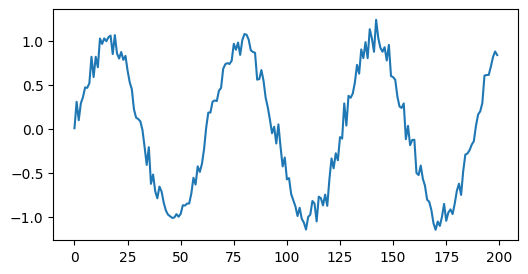

In [3]:
#original data
series = np.sin(0.1 * np.arange(200)) + 0.1 * np.random.randn(200)
plt.plot(series)

In [5]:
T = 10
X = []
Y = []

for i in range(len(series) - T) :
    x = series[i: i+T]
    X.append(x)
    y = series[i+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y).reshape(-1, 1)
N = len(X)
print(X.shape, Y.shape) 

(190, 10, 1) (190, 1)


In [23]:
#Autoregressive RNN model
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation = 'relu') (i)
x = Dense(1) (x)
model = Model(i, x)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='mse')
hist = model.fit(
    X[: -N//2], Y[: -N//2], 
    validation_data=(
        X[-N//2: ], 
        Y[-N//2: ]
    ),
    epochs = 100
)

Epoch 1/100
3/3 [==============================] - 1s 86ms/step - loss: 1.7822 - val_loss: 0.6019
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 0.5920 - val_loss: 0.6609
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 0.4460 - val_loss: 0.4749
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.3859 - val_loss: 0.3420
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 0.2138 - val_loss: 0.1994
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.1080 - val_loss: 0.1174
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0551 - val_loss: 0.1428
Epoch 8/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0763 - val_loss: 0.1046
Epoch 9/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0541 - val_loss: 0.0804
Epoch 10/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0464 - val_loss: 0.0800
Epoch 11/100
3/3 [=

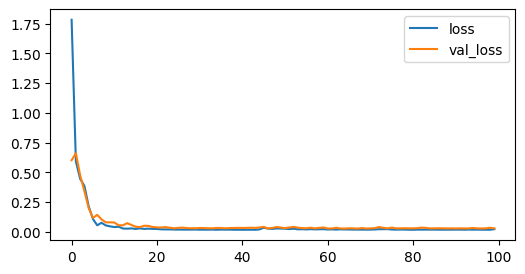

In [25]:
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.legend()

In [26]:
#1 step prediction- WRONG WAY
validation_target = Y[-N//2:]
validation_predictions = []

i = -N // 2
while(len(validation_predictions) < len(validation_target)):
    p = model.predict(X[i].reshape(1, -1, 1))[0, 0]  #predict() returns NxK where K = 1
    i+=1
    
    #update predictions
    validation_predictions.append(p)

1/1 [==============================] - 0s 17ms/step


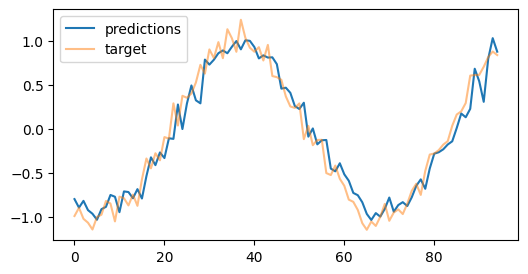

In [27]:
plt.plot(validation_predictions, label = 'predictions')
plt.plot(validation_target, label = 'target', alpha = 0.5)
plt.legend()

In [28]:
#multi step prediction- CORRECT WAY
validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2]  #1D array of length T

while(len(validation_predictions) < len(validation_target)):
    x = last_x.reshape(1, -1, 1)
    p = model.predict(x)[0, 0]
    
    #update predictions
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, shift = -1)
    last_x[-1] = p.reshape(-1)

1/1 [==============================] - 0s 19ms/step


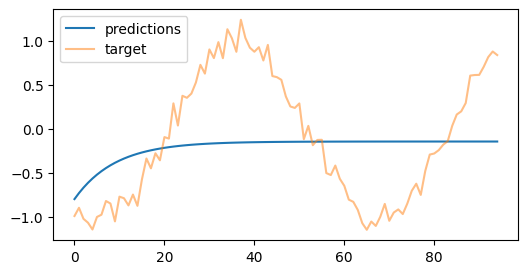

In [29]:
plt.plot(validation_predictions, label = 'predictions')
plt.plot(validation_target, label = 'target', alpha = 0.5)
plt.legend()